# Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

It uses a [sentiment lexicon](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt), which is a list of lexical features (e.g., slang words). These are generally labeled according to their semantic orientation as either positive or negative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyser = SentimentIntensityAnalyzer()

## Importing `clean_df`

In [3]:
clean_df = pd.read_pickle('../pickle/clean_df.pkl')

## Sentiment of Tweets

In [4]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)


In [5]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['clean_tweets'].apply(pol)

In [6]:
# checking that worked
clean_df.head(2)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets,polarity
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp..."
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp..."


## Parsing Out Polarity Score

In [7]:
# dropping unessential columns
# and seperating out 'polarity' dictionary
df = pd.concat([clean_df.drop(['total_votes', 'hate_speech_votes', 'other_votes', 'tweet', 'polarity'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)

In [8]:
df.head()

,label,clean_tweets,neg,neu,pos,compound
0,0,as a woman you shouldnt complain about clea...,0.000,0.905,0.095,0.2755
1,0,boy dats coldtyga dwn bad for cuffin dat ho...,0.241,0.759,0.000,-0.5423
2,0,dawg you ever fuck a bitch and she sta to...,0.597,0.403,0.000,-0.9460
3,0,she look like a tranny,0.000,0.615,0.385,0.3612
4,0,the shit you hear about me might be true or...,0.253,0.651,0.096,-0.6808


## Average Polarity Scores for Each Label

In [9]:
# new dataframe with average polarity score for each label
scores_df = df.groupby('label')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = df.groupby('label')['neu'].mean()
scores_df['avg_negative'] = df.groupby('label')['neg'].mean()
scores_df['avg_compound'] = df.groupby('label')['compound'].mean()


In [10]:
scores_df.head()

,label,avg_positive,avg_neutral,avg_negative,avg_compound
0,0,0.101183,0.652977,0.245156,-0.262459
1,1,0.083718,0.612277,0.300497,-0.362559


## Interpreting Polarity Scores

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories.

- Hate Speech tweets on average are 8% positive, 61% neutral, and 30% negative.
- Non Hate Speech tweets on average are 10% positive, 65% neutral, and 25% negative.

Although these are slightly similar scores, we can see that tweets with Hate Speech have more negativity overall. It makes sense that Non Hate Speech would also be negative, because that category contains offensive language regardless of classifciation. 

It's interesting that a majority of tweets in both classes were deemed neutral. 

The Compound score is a metric that calculates the sum of all the [lexicon ratings](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) which have been normalized between -1 and +1. With -1 being extreme negative and +1 being extreme positive.

- Hate Speech tweets on average have a compound score of -0.363
- Non Hate Speech tweets on average have a compound score of -0.263

According to this metric, both classes of tweets have negative sentiments because their normalized compound scores are less than -0.05.

This score seems to be the more reliable metric because it encompasses the overall sentiment of this corpus. Both classes contain negative, offensive language. But tweets that have been classified as Hate Speech are especially negative.

## Visualizing Distribution of Each Score

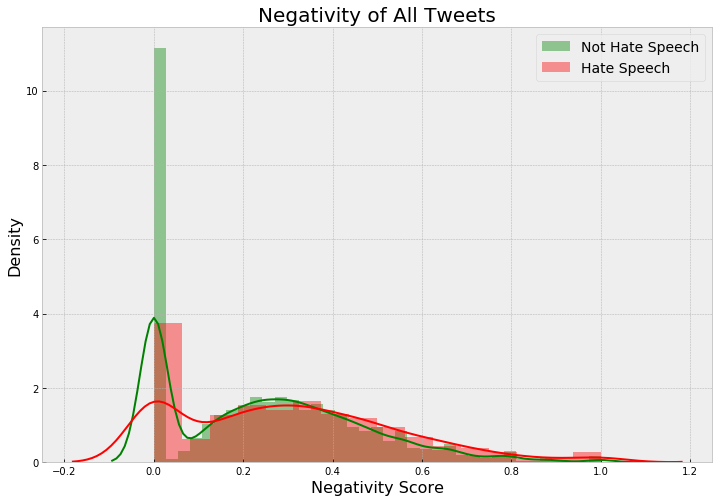

In [11]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['neg'][clean_df['label'] == 0], label='Not Hate Speech', color='green')
ax = sns.distplot(df['neg'][clean_df['label'] == 1], label='Hate Speech', color='red')
# setting label, title and legend
ax.set_title('Negativity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Negativity Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig('../visualizations/negativity_scores.png', bbox_inches = "tight", pad_inches=.5)

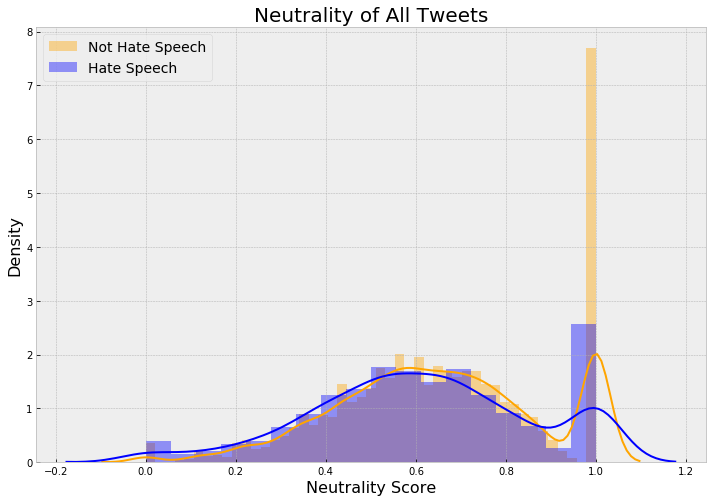

In [12]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['neu'][clean_df['label'] == 0], label='Not Hate Speech', color='orange')
ax = sns.distplot(df['neu'][clean_df['label'] == 1], label='Hate Speech', color='blue')
# setting label, title and legend
ax.set_title('Neutrality of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Neutrality Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig('../visualizations/neutrality_scores.png', bbox_inches = "tight", pad_inches=.5)

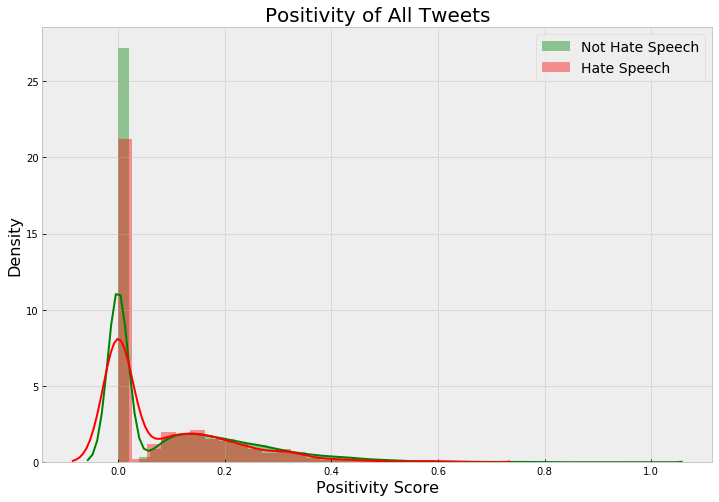

In [13]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['pos'][clean_df['label'] == 0], label='Not Hate Speech', color='green')
ax = sns.distplot(df['pos'][clean_df['label'] == 1], label='Hate Speech', color='red')
# setting label, title and legend
ax.set_title('Positivity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Positivity Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig('../visualizations/positivity_scores.png', bbox_inches = "tight", pad_inches=.5)

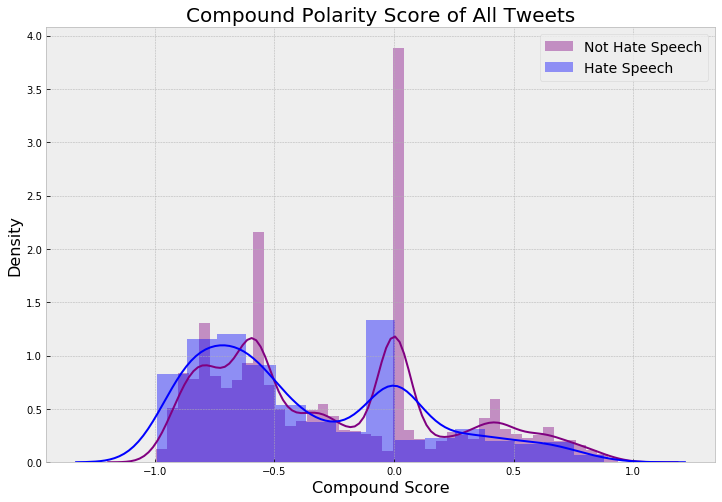

In [19]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['compound'][clean_df['label'] == 0], label='Not Hate Speech', color='purple')
ax = sns.distplot(df['compound'][clean_df['label'] == 1], label='Hate Speech', color='blue')
# setting label, title and legend
ax.set_title('Compound Polarity Score of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Compound Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig('../visualizations/compound_polarity_score.png', bbox_inches = "tight", pad_inches=.5)

## Bar Chart of Sentiment Scores by Tweet Type

In [15]:
# function to add percentage above each polarity score
def autolabel(rects):
    """Add a text label above bars to display its perentage of data."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height * 100) + '%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

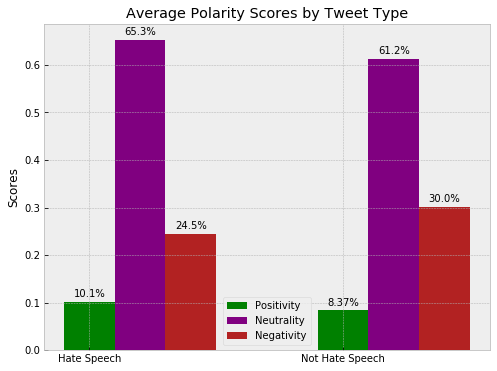

In [16]:
# setting labls and average scores
labels = ['Hate Speech', 'Not Hate Speech']
all_positivity = df['pos'].groupby(df['label']).mean()
all_neutrality = df['neu'].groupby(df['label']).mean()
all_negativity = df['neg'].groupby(df['label']).mean()

# set width of bars
width = 0.2  # the width of the bars
# set position of bar on x-axis
x = np.arange(len(labels))
r1 = x
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# graph figure
fig, ax = plt.subplots(figsize=(8, 6))
# 3 types of grouped bar graphs
ax1 = ax.bar(r1, all_positivity, width, label='Positivity', color='green')
ax2 = ax.bar(r2, all_neutrality, width, label='Neutrality', color='purple')
ax3 = ax.bar(r3, all_negativity, width, label='Negativity', color='firebrick')

# applying percentage display function
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)

# setting axis labels, title and legend location
ax.set_ylabel('Scores')
ax.set_title('Average Polarity Scores by Tweet Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('../visualizations/avg_polarity_by_tweet_type.png', bbox_inches = "tight", pad_inches=.5)